In [10]:
import pandas as pd
import numpy as np
import random
from itertools import groupby

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 365 days starting with November 1, 2014
rng = pd.date_range('11/1/2014', periods=365, freq='D')
rng

DatetimeIndex(['2014-11-01', '2014-11-02', '2014-11-03', '2014-11-04',
               '2014-11-05', '2014-11-06', '2014-11-07', '2014-11-08',
               '2014-11-09', '2014-11-10',
               ...
               '2015-10-22', '2015-10-23', '2015-10-24', '2015-10-25',
               '2015-10-26', '2015-10-27', '2015-10-28', '2015-10-29',
               '2015-10-30', '2015-10-31'],
              dtype='datetime64[ns]', length=365, freq='D')

In [3]:
# generate dataframe with random integer elements between 1000 and 10000 of
# size 100 rows by 365 columns
df = pd.DataFrame(np.random.randint(1000,10000,size=(100, 365)), columns=rng)
df.head()

,2014-11-01 00:00:00,2014-11-02 00:00:00,2014-11-03 00:00:00,2014-11-04 00:00:00,2014-11-05 00:00:00,2014-11-06 00:00:00,2014-11-07 00:00:00,2014-11-08 00:00:00,2014-11-09 00:00:00,2014-11-10 00:00:00,...,2015-10-22 00:00:00,2015-10-23 00:00:00,2015-10-24 00:00:00,2015-10-25 00:00:00,2015-10-26 00:00:00,2015-10-27 00:00:00,2015-10-28 00:00:00,2015-10-29 00:00:00,2015-10-30 00:00:00,2015-10-31 00:00:00
0,3039,4963,1880,6720,7823,5586,8997,3030,8282,4699,...,1214,2478,2976,6332,9039,9217,9007,8277,1301,7687
1,6390,2996,4506,4868,6895,6106,2120,9979,6839,2804,...,1290,3771,8529,9476,3849,4036,9278,5368,6925,6026
2,7591,2101,3685,9723,6136,3396,2307,2539,3304,3184,...,8404,9547,6365,5636,6095,8586,5676,5196,8947,4183
3,5400,5401,8778,8134,3515,9622,9833,6944,9219,4815,...,3005,5656,9819,8790,8529,3500,2138,4299,3978,9118
4,6626,2871,2418,4984,2005,6554,1528,2655,4773,8606,...,8744,3414,9406,3638,6845,8794,7163,4490,2156,5564


In [4]:
max_options = [110000,  160000, 115000, 130000, 120000]
max_list = []

for i in range(100):
    max_list.append(random.choice(max_options))

In [5]:
df.insert(0,'MaxCapacity',max_list)
df_sorted = df.sort_values(by = 'MaxCapacity')

In [6]:
df_sorted.head()

,MaxCapacity,2014-11-01 00:00:00,2014-11-02 00:00:00,2014-11-03 00:00:00,2014-11-04 00:00:00,2014-11-05 00:00:00,2014-11-06 00:00:00,2014-11-07 00:00:00,2014-11-08 00:00:00,2014-11-09 00:00:00,...,2015-10-22 00:00:00,2015-10-23 00:00:00,2015-10-24 00:00:00,2015-10-25 00:00:00,2015-10-26 00:00:00,2015-10-27 00:00:00,2015-10-28 00:00:00,2015-10-29 00:00:00,2015-10-30 00:00:00,2015-10-31 00:00:00
36,110000,7950,6608,3981,3624,2410,2892,7497,2362,6644,...,2953,8836,4361,4934,7997,7570,5662,1121,3073,5231
26,110000,4275,8569,4777,8199,9980,5784,5051,9089,4536,...,6843,3050,1784,8633,7462,9875,5936,2764,4824,6939
55,110000,1624,7273,2923,7447,1889,3877,7269,1158,8681,...,6105,1693,7497,1604,4954,3690,1770,5974,2726,4299
20,110000,1729,5312,6217,3375,9507,6263,7835,5690,2591,...,3684,6121,1095,8090,2084,3173,9554,9729,5761,9200
46,110000,5723,6446,4319,3172,3681,2260,6526,8370,1637,...,5978,7129,4016,7038,8762,3330,7270,9060,5275,1041


In [8]:
# find how many days it takes to get max capacity for each sample
total_count_list = []

for index, row in df_sorted.iterrows():
    total = 0
    counts_list = []
    dayCounts = 0
    maxC = row[df.columns[0]]
    
    for x in range(1,365):
        total += row[df.columns[x]]
        dayCounts += 1
        if total >= maxC:
            counts_list.append(dayCounts)
            dayCounts = 0
            total = 0
    total_count_list.append(counts_list)
total_count_list[0]

[23, 22, 24, 23, 19, 21, 20, 25, 24, 20, 25, 21, 22, 18, 19, 21]

In [21]:
def plot_histogram(x):
    days = sorted(set(total_count_list[x]))  #sorted(total_count_list[1])
    print(days)
    days_freq = [len(list(group)) for key, group in groupby(sorted(total_count_list[x]))]
    print(days_freq)

    pos = np.arange(len(days))
    width = 1.0     # gives histogram aspect to the bar diagram

    ax = plt.axes()
    ax.set_xticks(pos + (width / 2))
    ax.set_xticklabels(days)

    plt.bar(pos, days_freq, width, color='r')
    plt.show()

[18, 19, 20, 21, 22, 23, 24, 25]
[1, 2, 2, 3, 2, 2, 2, 2]


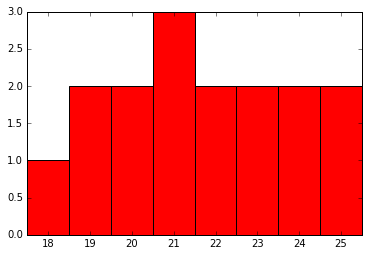

In [22]:
plot_histogram(0)

[16, 17, 18, 19, 20, 21, 22, 24]
[1, 2, 1, 3, 1, 5, 4, 1]


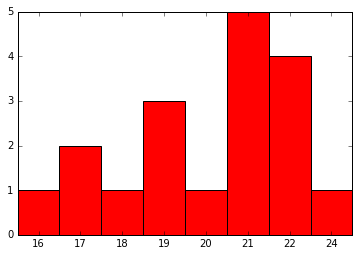

In [23]:
plot_histogram(1)

[18, 19, 20, 21, 22, 23, 24]
[1, 3, 3, 4, 4, 1, 1]


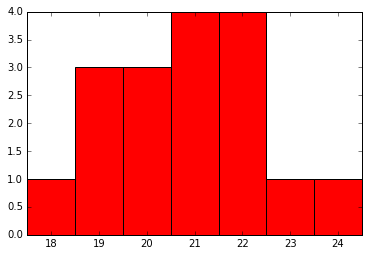

In [24]:
plot_histogram(2)

[17, 19, 20, 21, 22, 23]
[1, 4, 6, 5, 1, 1]


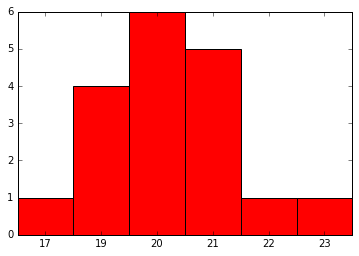

In [25]:
plot_histogram(3)

[17, 18, 19, 20, 21, 22, 23, 25, 27]
[1, 2, 2, 4, 3, 2, 1, 1, 1]


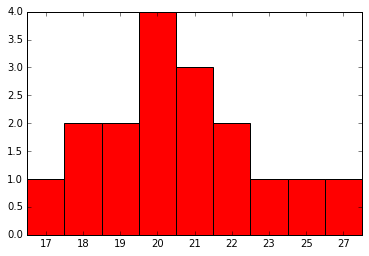

In [26]:
plot_histogram(4)

[17, 18, 19, 20, 21, 22, 23, 25]
[1, 3, 2, 2, 3, 2, 3, 1]


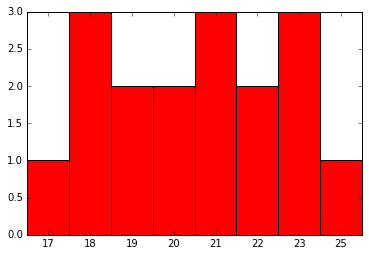

In [27]:
plot_histogram(5)

[16, 17, 19, 20, 21, 22, 23, 24, 25]
[1, 1, 2, 1, 2, 5, 3, 1, 1]


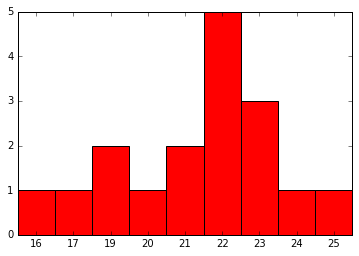

In [28]:
plot_histogram(6)

In [35]:
x = 5 + 3 * np.random.randn(100) # Generate from a N(5, 9) distribution
import scipy.stats as st

print(x)
results = st.norm.fit(x)
results

[ -2.8111762    9.54988314   5.96198816   6.7681048    7.75526274
   1.61489591   6.30676759   8.49873058   6.27860941   3.08162147
  11.49810206   7.40715844   3.44379655  10.06220782   2.16114893
   8.13997028   4.35773276   5.28679355  -1.80118769   1.64772851
   9.57273393   1.66897344   5.13367514   3.13919202  -1.44272509
   3.70918103   0.8788308    5.57616382   6.36534772   3.95757136
   6.57581476   7.37984523   6.98365671   1.27547322   3.83576461
   5.9239005    8.5420829    4.41851636   4.58180618   4.95044408
   2.52334429   5.57586091   6.86169075  -2.38414781   9.10201191
   4.75435763   1.33170638   2.2444933    0.95385282   4.77576134
   5.82937012   6.00800962   1.21875509   3.70178157  10.87423138
   9.87825084   7.45905221  -0.45189752   5.20520746   4.26846916
   4.10675638   4.22158936   5.86245917   6.77397145   1.79315987
   3.25022988   7.79335142  10.63033545  13.28179087   6.49783011
   4.83687382   9.33946455  -0.37551861   5.17429305   1.24290425
   3.21271

(4.8129478850250687, 3.1392748531003538)

In [36]:
np.mean(x), np.std(x, ddof=0)

(4.8129478850250687, 3.1392748531003538)

In [40]:
x = total_count_list[18]
results = st.norm.fit(total_count_list[18])
results

(21.6875, 2.4165768661476505)

In [41]:
np.mean(x), np.std(x, ddof=0)

(21.6875, 2.4165768661476505)